In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transfusion_path="../input/blood-donation-data/blood donation.csv"

In [3]:
transfusion_data=pd.read_csv(transfusion_path)

* 1. **Exploratory Data Analysis(understanding the data)**

In [4]:
transfusion_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0,13,3250,28,1
1,0,2,500,4,0
2,0,26,6500,76,1
3,0,3,750,4,0
4,0,8,2000,59,0


In [5]:
transfusion_data.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,9,8,2000,38,1
744,9,9,2250,16,0
745,9,9,2250,38,0
746,9,9,2250,45,0
747,9,9,2250,54,0


In [6]:
transfusion_data.shape

(748, 5)

In [7]:
transfusion_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
transfusion_data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [9]:
transfusion_data.nunique()

Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64

In [10]:
#cleaning the data
transfusion_data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

from the above ,it means there is no null value is present in the dataset

<AxesSubplot:>

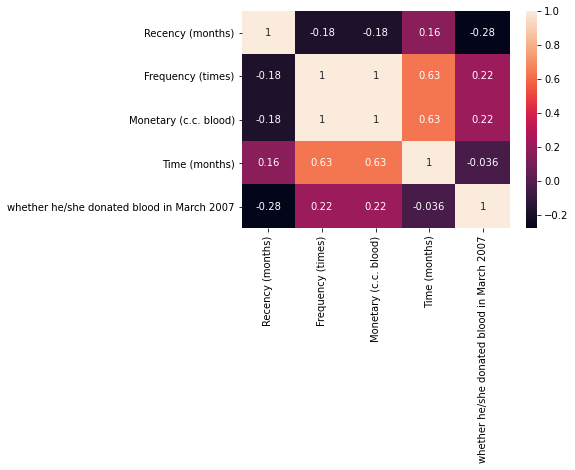

In [11]:
#relationship Analysis
corelation=transfusion_data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

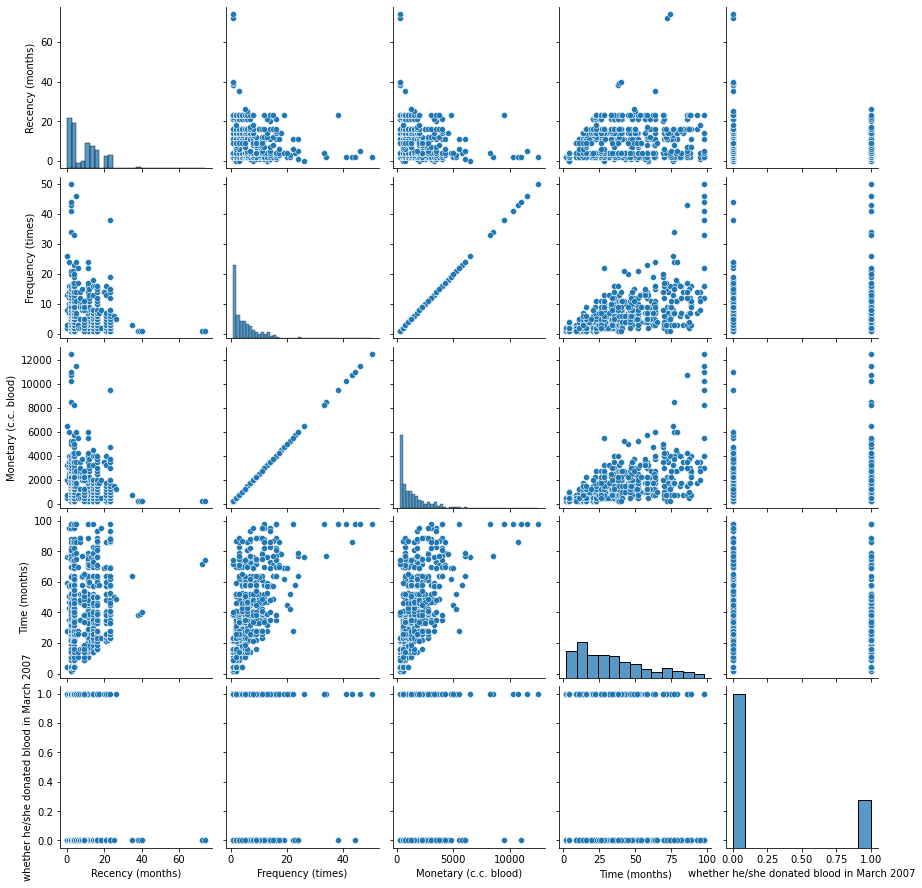

In [12]:
sns.pairplot(transfusion_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency (times)'>

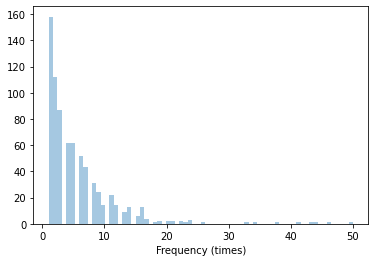

In [13]:
sns.distplot(a=transfusion_data['Frequency (times)'],kde=False,bins=70)

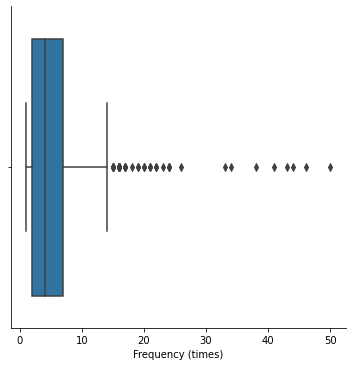

In [14]:
sns.catplot(x='Frequency (times)',kind='box',data=transfusion_data)

In [15]:
transfusion_data.rename(
    columns = {'whether he/she donated blood in March 2007': 'target'},
    inplace = True
)

transfusion_data.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,0,13,3250,28,1
1,0,2,500,4,0


In [16]:
print('Target incidence proportions:\n')
print(round(transfusion_data.target.value_counts(normalize = True) * 100,3))

Target incidence proportions:

0    76.203
1    23.797
Name: target, dtype: float64


In [17]:
#Splitting transfusion into train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    transfusion_data.drop(columns='target'),
    transfusion_data.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion_data.target
)

print('First two rows of X_train: ')
X_train.head(2)

First two rows of X_train: 


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
260,2,1,250,2
313,2,15,3750,49


In [18]:
#Selecting model using TPOT

from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

tpot = TPOTClassifier(
    generations=7,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7633621546412244

Generation 2 - Current best internal CV score: 0.7633621546412244

Generation 3 - Current best internal CV score: 0.763435503798021

Generation 4 - Current best internal CV score: 0.763435503798021

Generation 5 - Current best internal CV score: 0.763435503798021

Generation 6 - Current best internal CV score: 0.764140778155826

Generation 7 - Current best internal CV score: 0.7648241490991149

Best pipeline: LogisticRegression(VarianceThreshold(input_matrix, threshold=0.001), C=0.001, dual=False, penalty=l2)

AUC score: 0.7273

Best pipeline steps:
1. VarianceThreshold(threshold=0.001)
2. LogisticRegression(C=0.001, random_state=42)


In [19]:
#Checking the variance 

round(X_train.var(),3)

Recency (months)              69.577
Frequency (times)             37.596
Monetary (c.c. blood)    2349736.599
Time (months)                610.813
dtype: float64

***Monetary (c.c. blood)'s variance is very high in comparison to any other column in the datase**t*

**One way to correct for high variance is to use log normalization.**

In [20]:
#Log Normalization

import numpy as np

X_train_normed, X_test_normed= X_train.copy(), X_test.copy()

col_to_normalize = 'Monetary (c.c. blood)'

for df_ in [X_train_normed, X_test_normed]:
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    df_.drop(columns = col_to_normalize, inplace=True)

round(X_train_normed.var(),3)

Recency (months)      69.577
Frequency (times)     37.596
Time (months)        610.813
monetary_log           0.876
dtype: float64

In [21]:
 #Training the linear regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_normed, y_train)

logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7362


In [22]:
#conclusion 

from operator import itemgetter

sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key = itemgetter(1),
    reverse = True
)

[('logreg', 0.7361729179910997), ('tpot', 0.7272727272727273)]